In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filenames = ['./data/als_sparse_08-01-2021_21-49-39.json', './data/als_full_08-01-2021_21-49-51.json']
data = {}
for filename in filenames:
    with open(filename, 'r') as f:
        data[filename.split('_')[1]] = json.load(f)

In [3]:
len(data['sparse']['fun_evals'])

43

In [17]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
def plot(y):
    plt.figure(figsize=(12, 8))
    plt.plot(y)
    plt.yticks([], [])
   

In [7]:
d = np.array(data['sparse']['fun_evals'], dtype=np.float64)
d-d[-1]

array([ 3.64688832e+04,  1.32468985e+03,  1.04916592e+02,  1.52317846e+01,
        3.96116576e+00,  1.35391071e+00,  5.04812784e-01,  1.93720506e-01,
        7.52140880e-02,  2.93684403e-02,  1.15021446e-02,  4.51250575e-03,
        1.77208416e-03,  6.96307456e-04,  2.73693935e-04,  1.07601081e-04,
        4.23078309e-05,  1.66362443e-05,  6.54198811e-06,  2.57260399e-06,
        1.01170735e-06,  3.97820259e-07,  1.56433089e-07,  6.15254976e-08,
        2.42143869e-08,  9.48784873e-09,  3.75439413e-09,  1.48429535e-09,
        5.82076609e-10,  2.03726813e-10,  1.45519152e-10,  2.91038305e-11,
        0.00000000e+00,  2.91038305e-11,  0.00000000e+00, -2.91038305e-11,
        0.00000000e+00, -2.91038305e-11,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

/home/nick/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/home/nick/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


Text(0, 0.5, 'f(x_i) - f*')

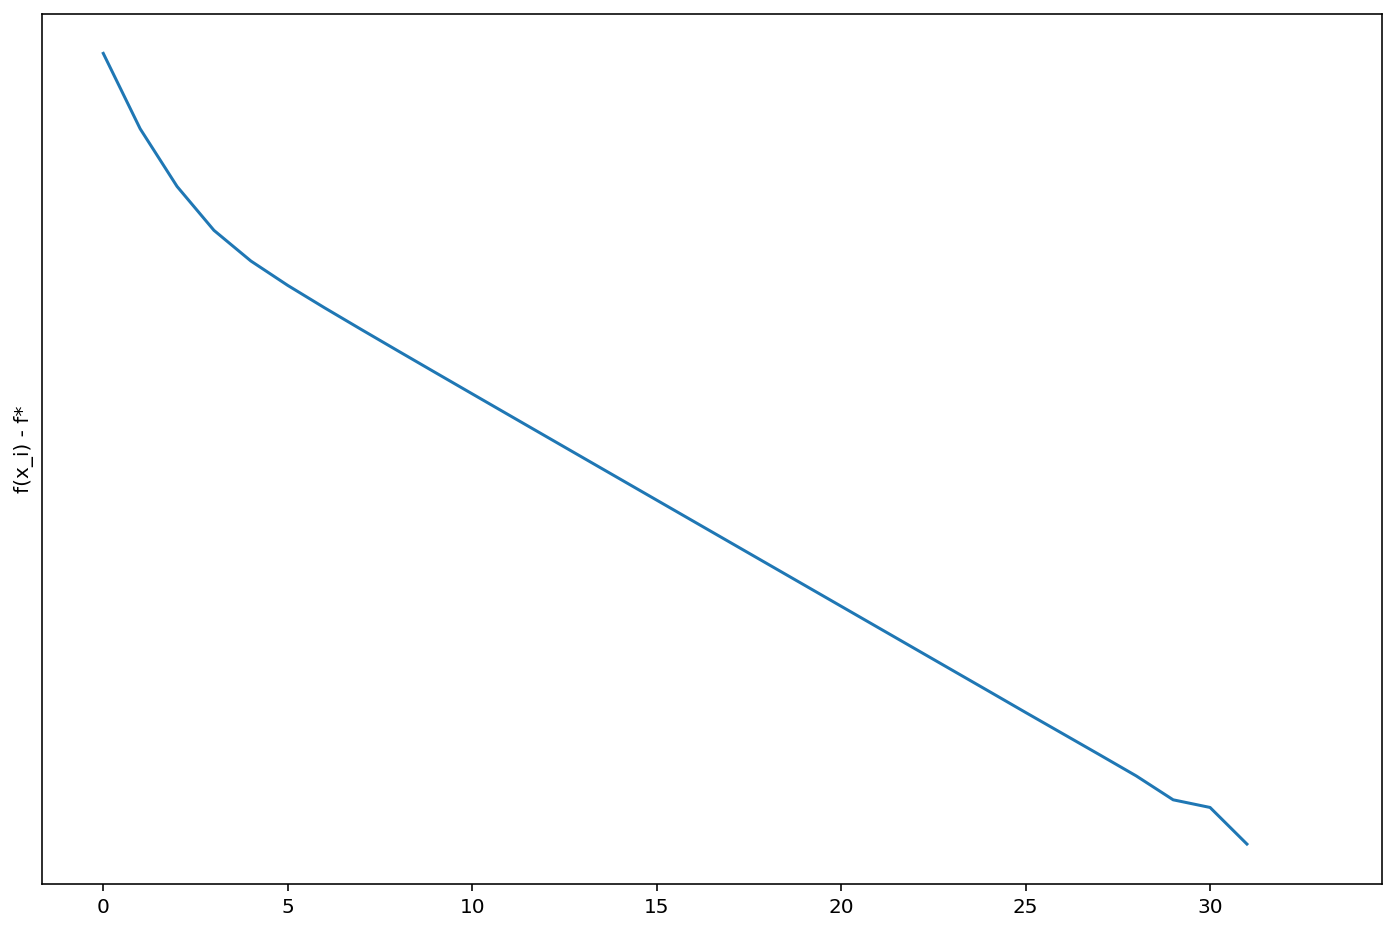

In [20]:
# fun eval (wrt proposed min) in log scale
mode = 'sparse'
d = np.array(data[mode]['fun_evals'], dtype=np.float64)
plot(np.log(d-d[-1])) # dist from "f*"
plt.ylabel('f(x_i) - f*')

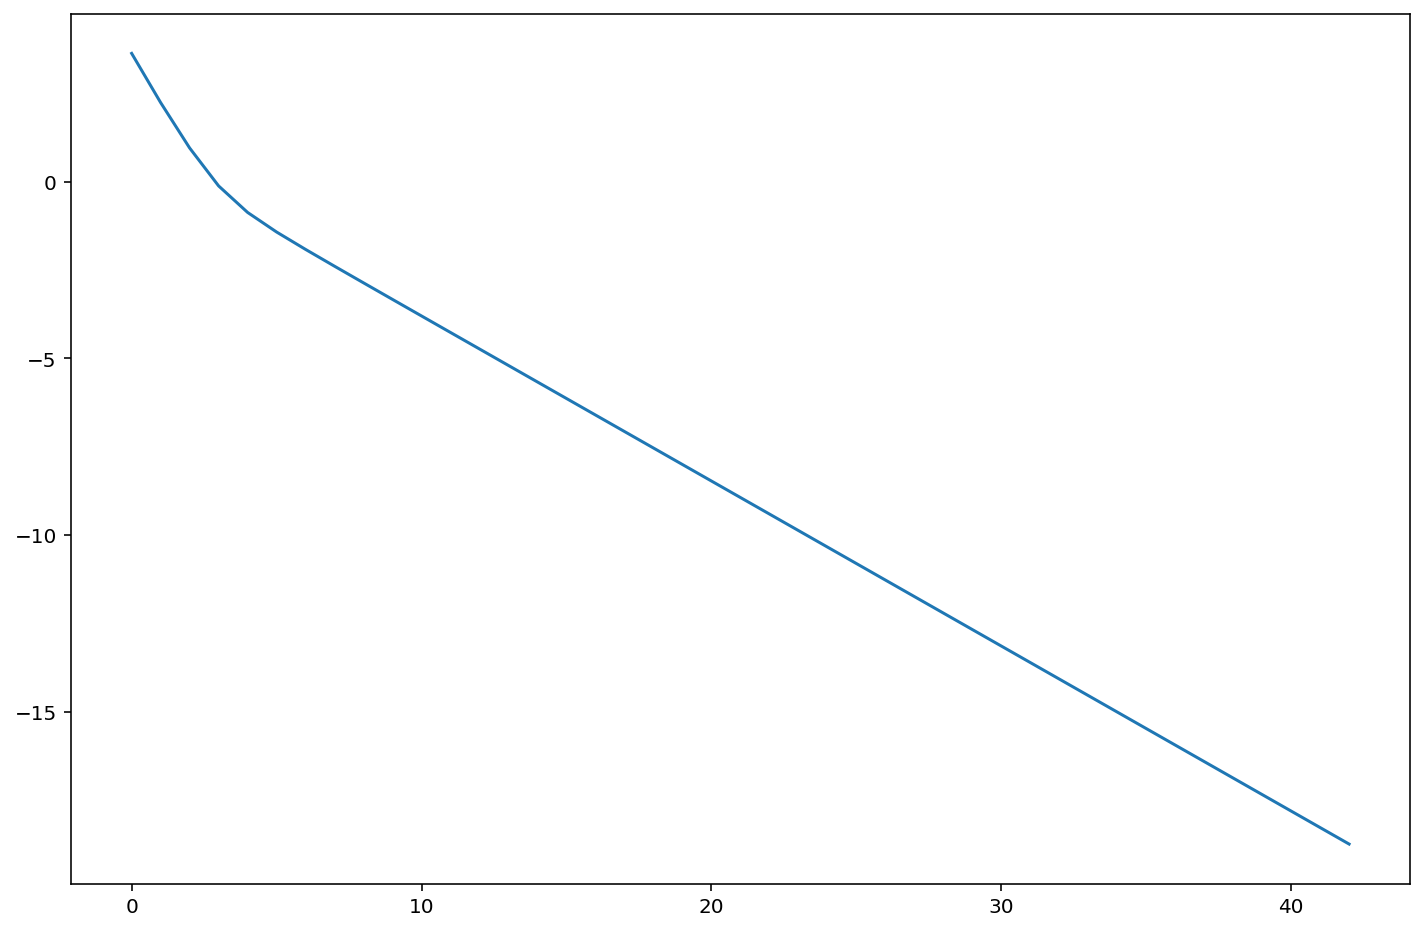

In [36]:
# grad theta
mode = 'sparse'
d = np.array(data[mode]['grad_theta'], dtype=np.float64)
plot(np.log(d))

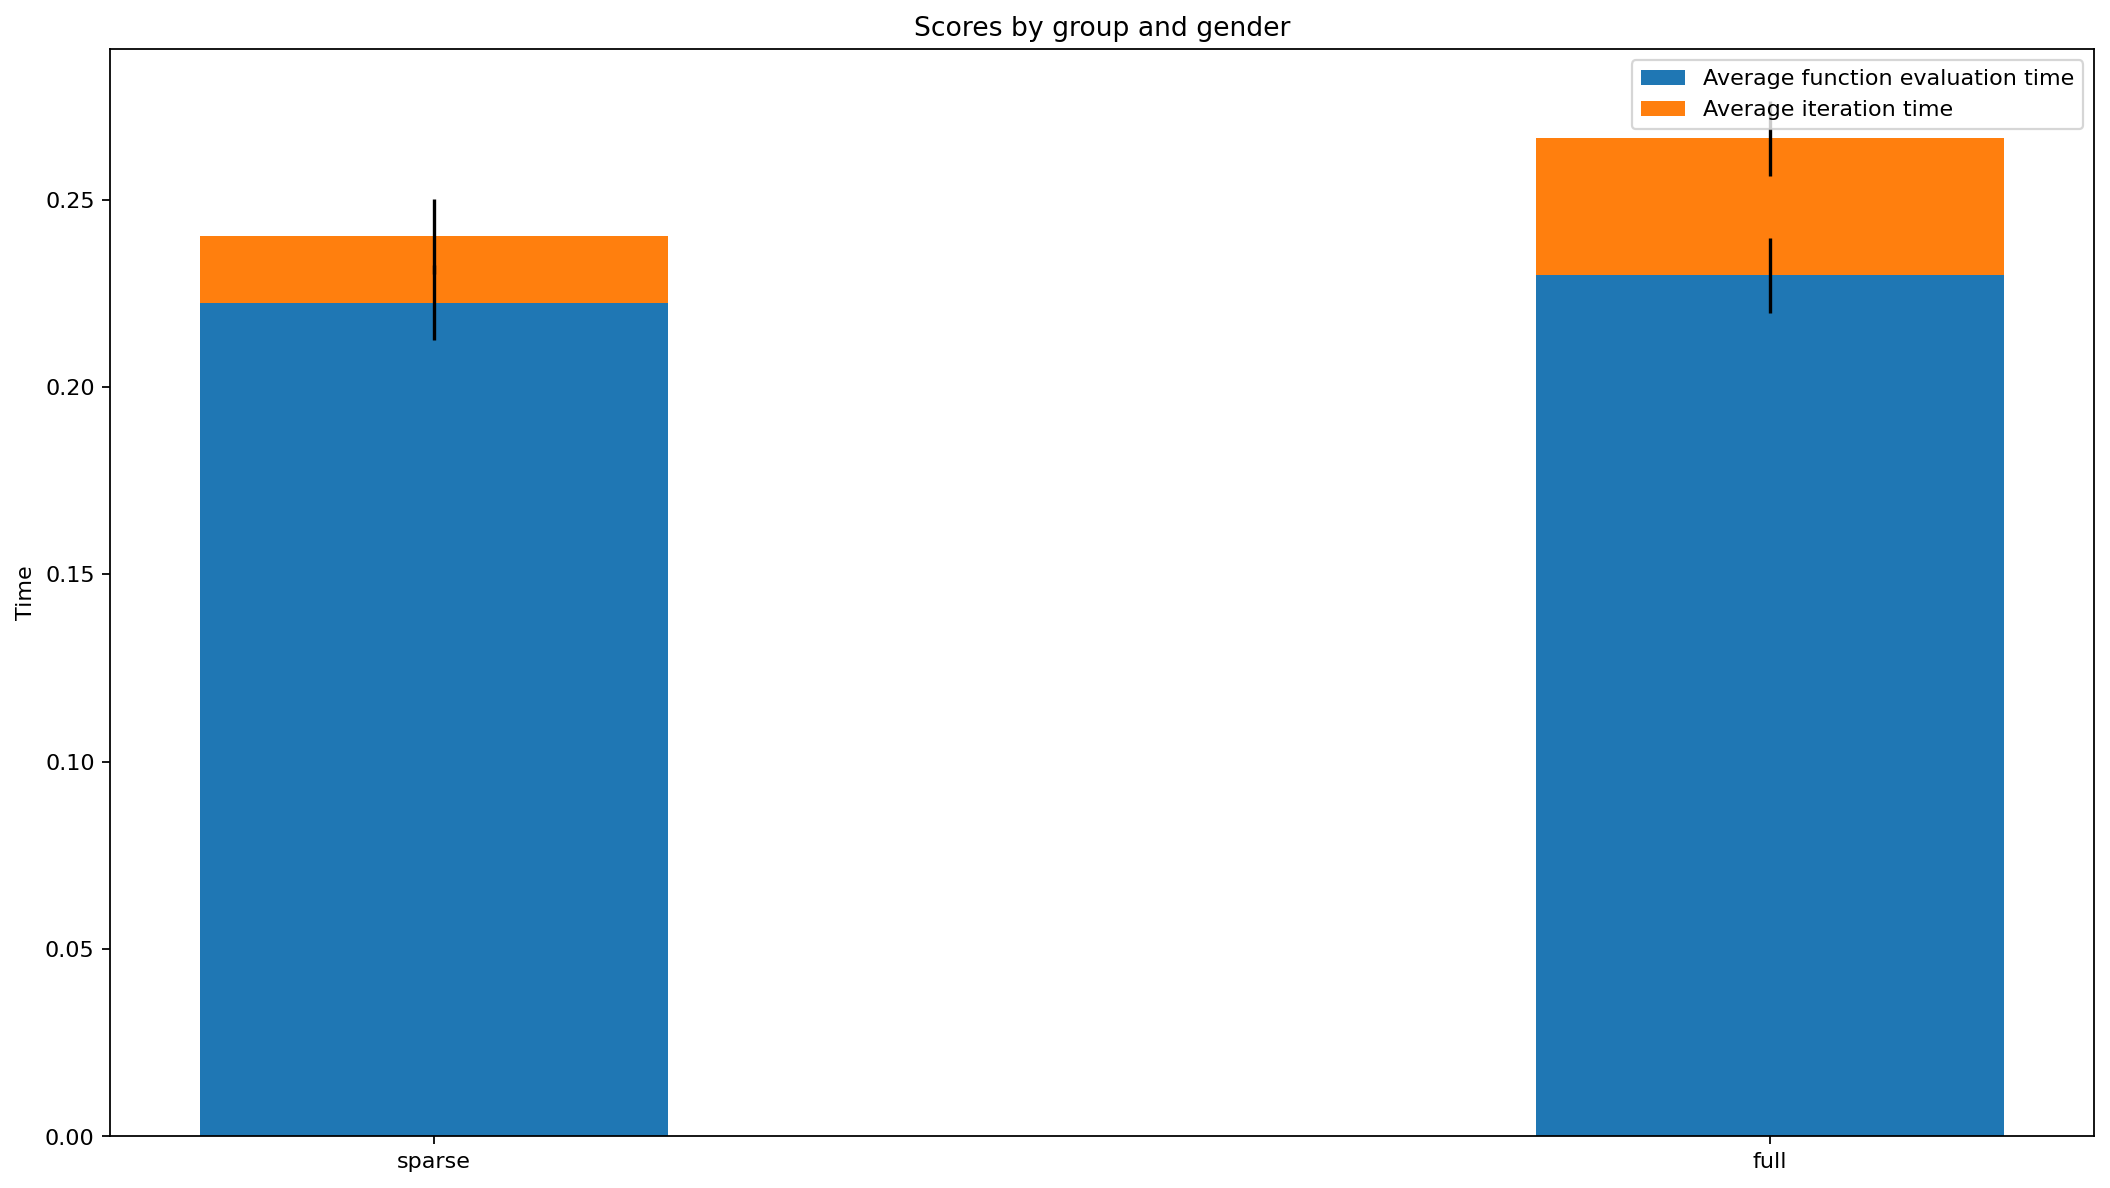

In [63]:
# time comparison (plot bar) DOESNT MAKE SENSE LIKE THIS FUN EVAL TIME IS COMPUTED OUTSIDE LOOP
plt.figure(figsize=(16,9), dpi= 80)

N = 2
colors = [plt.cm.Spectral(i*2/float(N-1)) for i in range(N)]
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
fun_eval_time = [data[d]['avg_fun_eval_time'] for d in data]
avg_iter_time = [data[d]['avg_iter_time'] for d in data]

# std dev with error on y 
p1 = plt.bar(ind, avg_iter_time, width, yerr=[.01, .01])
p2 = plt.bar(ind, fun_eval_time, width,
             bottom=avg_iter_time, yerr=[.01, .01])

plt.ylabel('Time')
plt.title('Scores by group and gender')
plt.xticks(ind, [d for d in data])
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Average function evaluation time', 'Average iteration time'))

plt.show()



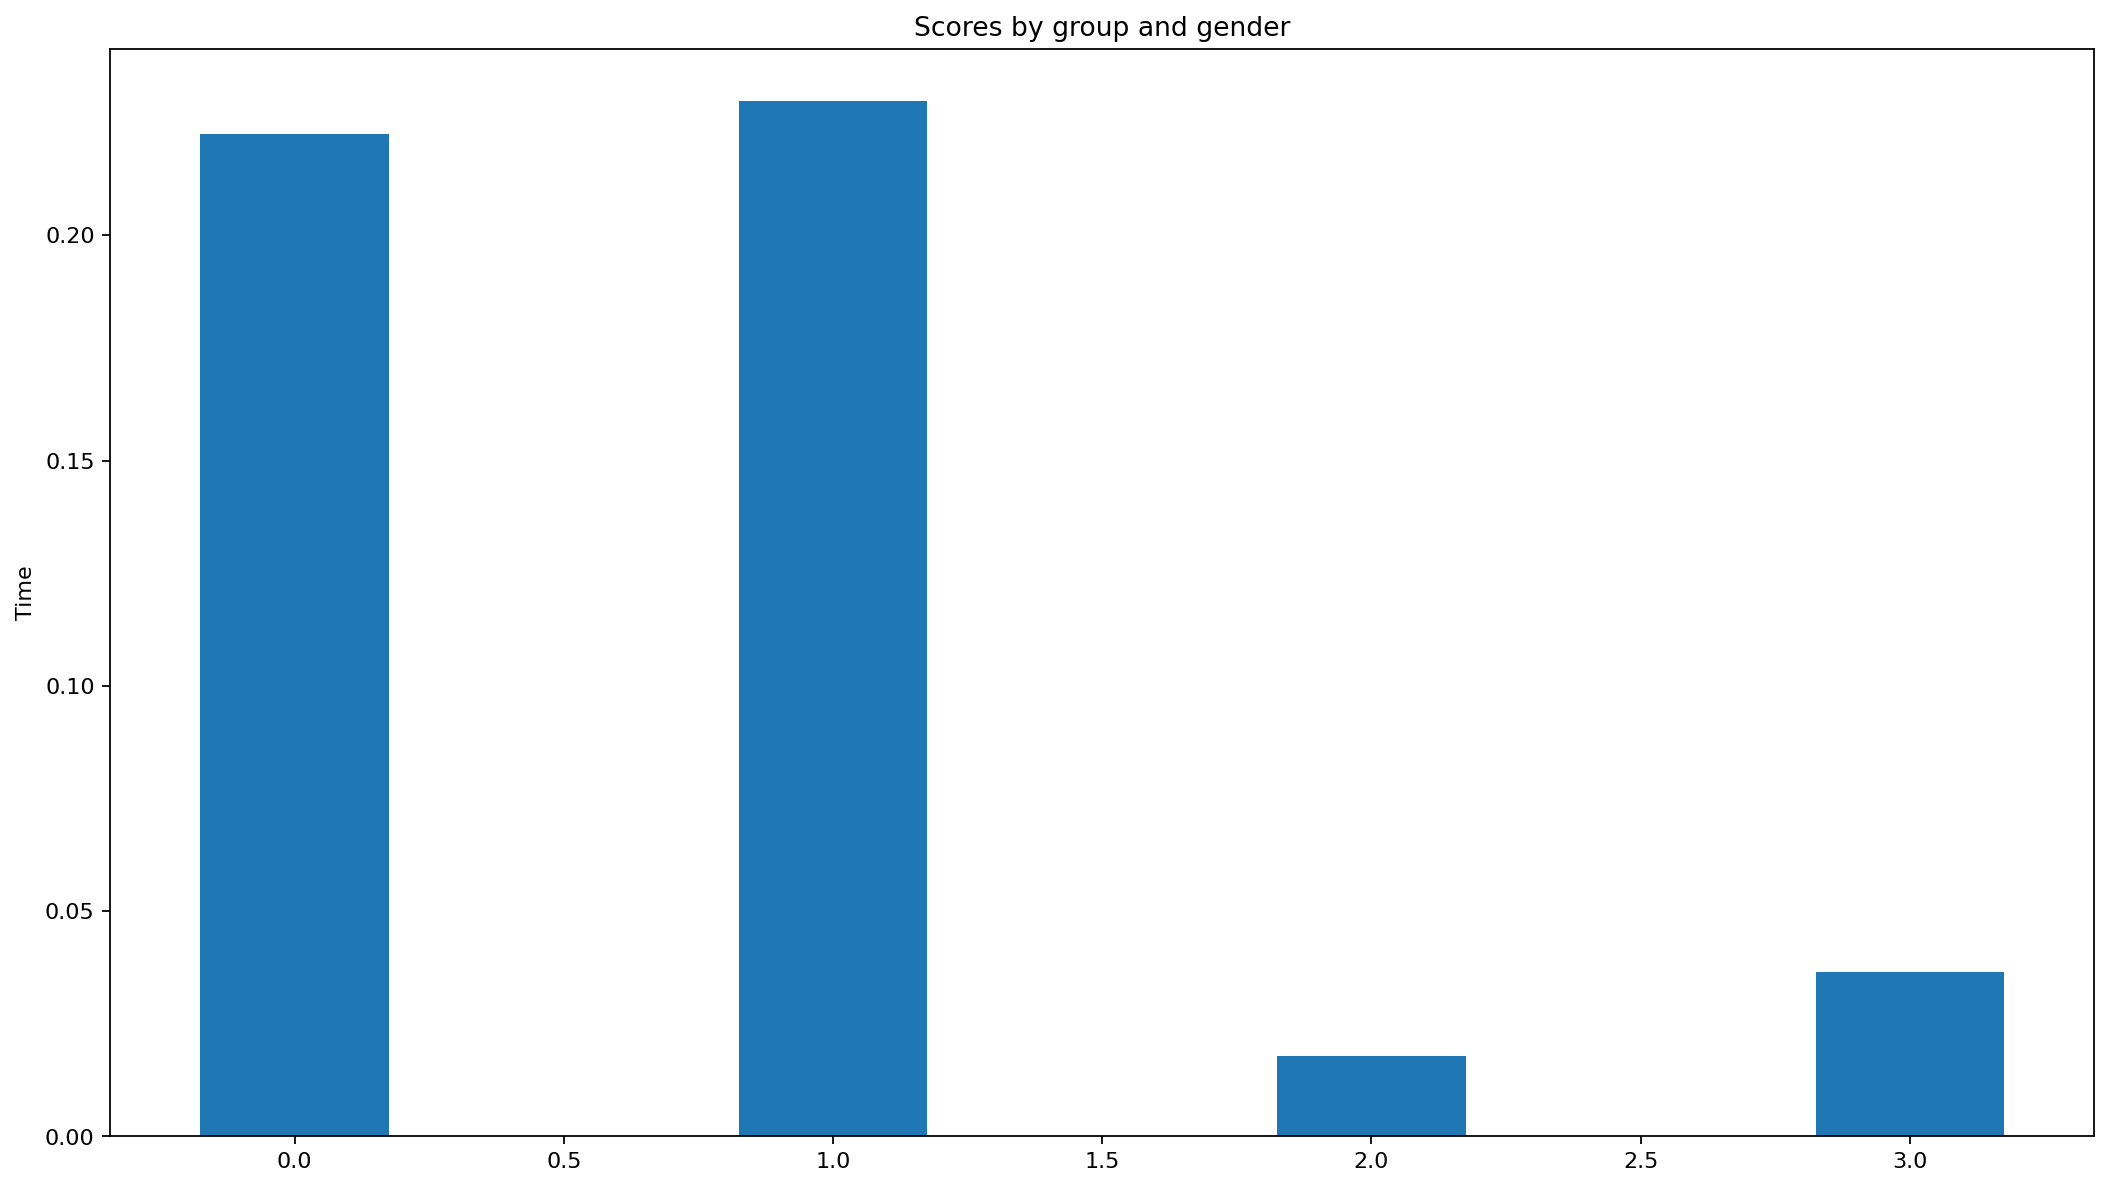

In [69]:
plt.figure(figsize=(16,9), dpi= 80)

N = 2
colors = [plt.cm.Spectral(i*2/float(N-1)) for i in range(N)]
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
fun_eval_time = [data[d]['avg_fun_eval_time'] for d in data]
avg_iter_time = [data[d]['avg_iter_time'] for d in data]

# std dev with error on y 
plt.bar(range(4), avg_iter_time+fun_eval_time, width)

plt.ylabel('Time')
plt.title('Scores by group and gender')
# plt.xticks(ind, [d for d in data]+[d for d in data])
#plt.yticks(np.arange(0, 81, 10))
# plt.legend('Average function evaluation time', 'Average iteration time')


plt.show()

In [37]:
data

{'sparse': {'avg_iter_time': 0.22246254876602528,
  'total_convergence_time': 9.565889596939087,
  'avg_fun_eval_time': 0.01779701543408771,
  'num_iterations': 43,
  'grad_u_norm': 7.3349871207179064e-09,
  'theta_diff_norm': 1.0315224415817896e-07,
  'mse': 2.4672041318464553,
  'fun_evals': [273715.2324893616,
   238571.0391682576,
   237351.2659101513,
   237261.5811029897,
   237250.31048411474,
   237247.70322906214,
   237246.85413113868,
   237246.5430388609,
   237246.42453244317,
   237246.37868679548,
   237246.36082049974,
   237246.3538308609,
   237246.3510904393,
   237246.3500146626,
   237246.34959204908,
   237246.34942595623,
   237246.34936066298,
   237246.3493349914,
   237246.34932489714,
   237246.34932092775,
   237246.34931936685,
   237246.34931875297,
   237246.34931851158,
   237246.34931841667,
   237246.34931837936,
   237246.34931836464,
   237246.3493183589,
   237246.34931835663,
   237246.34931835573,
   237246.34931835535,
   237246.3493183553,
   23